In [1]:
# Install required libraries
!pip install requests pandas numpy

# Import libraries
import requests
import pandas as pd
import numpy as np
import datetime

# Configuration for displaying DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Define helper functions for data extraction
def getBoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get(f"https://api.spacexdata.com/v4/rockets/{x}").json()
            BoosterVersion.append(response['name'])

def getLaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{x}").json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

def getPayloadData(data):
    for load in data['payloads']:
        if load:
            response = requests.get(f"https://api.spacexdata.com/v4/payloads/{load}").json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

def getCoreData(data):
    for core in data['cores']:
        if core['core']:
            response = requests.get(f"https://api.spacexdata.com/v4/cores/{core['core']}").json()
            Block.append(response['block'])
            ReusedCount.append(response['reuse_count'])
            Serial.append(response['serial'])
        else:
            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)
        Outcome.append(f"{core['landing_success']} {core['landing_type']}")
        Flights.append(core['flight'])
        GridFins.append(core['gridfins'])
        Reused.append(core['reused'])
        Legs.append(core['legs'])
        LandingPad.append(core['landpad'])

# Fetch SpaceX launch data
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)
print(f"API Status Code: {response.status_code}")

# Create DataFrame from JSON
data = pd.json_normalize(response.json())

# Display first 5 rows
print("\nFirst 5 rows of raw data:")
print(data.head())

# Process data
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data = data[data['cores'].map(len) == 1]
data = data[data['payloads'].map(len) == 1]
data['cores'] = data['cores'].map(lambda x: x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])
data['date'] = pd.to_datetime(data['date_utc']).dt.date
data = data[data['date'] <= datetime.date(2020, 11, 13)]

# Initialize global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

# Extract data using helper functions
getBoosterVersion(data)
getLaunchSite(data)
getPayloadData(data)
getCoreData(data)

# Create final DataFrame
launch_dict = {
    'FlightNumber': list(data['flight_number']),
    'Date': list(data['date']),
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

df = pd.DataFrame(launch_dict)

# Display processed data
print("\nProcessed data (first 5 rows):")
print(df.head())

# Filter for Falcon 9 launches
data_falcon9 = df[df['BoosterVersion'] == 'Falcon 9']
data_falcon9.reset_index(drop=True, inplace=True)
data_falcon9['FlightNumber'] = list(range(1, len(data_falcon9) + 1))

# Handle missing values
payload_mean = data_falcon9['PayloadMass'].mean()
data_falcon9['PayloadMass'].replace(np.nan, payload_mean, inplace=True)

# Verify missing values
print("\nMissing values after cleaning:")
print(data_falcon9.isnull().sum())

# Save to CSV
data_falcon9.to_csv('dataset_part_1.csv', index=False)
print("\nData successfully saved to 'dataset_part_1.csv'")

API Status Code: 200

First 5 rows of raw data:
       static_fire_date_utc  static_fire_date_unix    tbd    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False  False     0.0   
1                      None                    NaN  False  False     0.0   
2                      None                    NaN  False  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False  False     0.0   
4                      None                    NaN  False  False     0.0   

                     rocket  success  \
0  5e9d0d95eda69955f709d1eb    False   
1  5e9d0d95eda69955f709d1eb    False   
2  5e9d0d95eda69955f709d1eb    False   
3  5e9d0d95eda69955f709d1eb     True   
4  5e9d0d95eda69955f709d1eb     True   

                                                                                                                                                                                details  \
0                                                                  

/var/folders/54/8p1pzd9s4nz5651vsnlrbfv40000gn/T/ipykernel_48136/1442136314.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['FlightNumber'] = list(range(1, len(data_falcon9) + 1))
/var/folders/54/8p1pzd9s4nz5651vsnlrbfv40000gn/T/ipykernel_48136/1442136314.py:132: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the opera

Flowchart saved as 'spacex_data_flow.png'


SPACEX DATA COLLECTION PROCESS

1. INITIALIZATION:
   - Install required libraries: requests, pandas, numpy
   - Import modules and configure display settings

2. HELPER FUNCTION DEFINITIONS:
   - getBoosterVersion(): Fetches rocket name using rocket ID
   - getLaunchSite(): Retrieves launch site coordinates and name
   - getPayloadData(): Collects payload mass and orbit information
   - getCoreData(): Gathers core/booster details including landing status

3. API REQUEST EXECUTION:
   - GET request to SpaceX API endpoint: https://api.spacexdata.com/v4/launches/past
   - Verify HTTP status code (200 = success)
   - Parse JSON response into pandas DataFrame

4. DATA PREPROCESSING:
   - Filter relevant columns: rocket, payloads, launchpad, cores, flight_number, date_utc
   - Remove entries with multiple cores/payloads
   - Convert date_utc to date format
   - Filter launches up to 2020-11-13

5. DATA ENRICHMENT:
   - Initialize empty lists for f

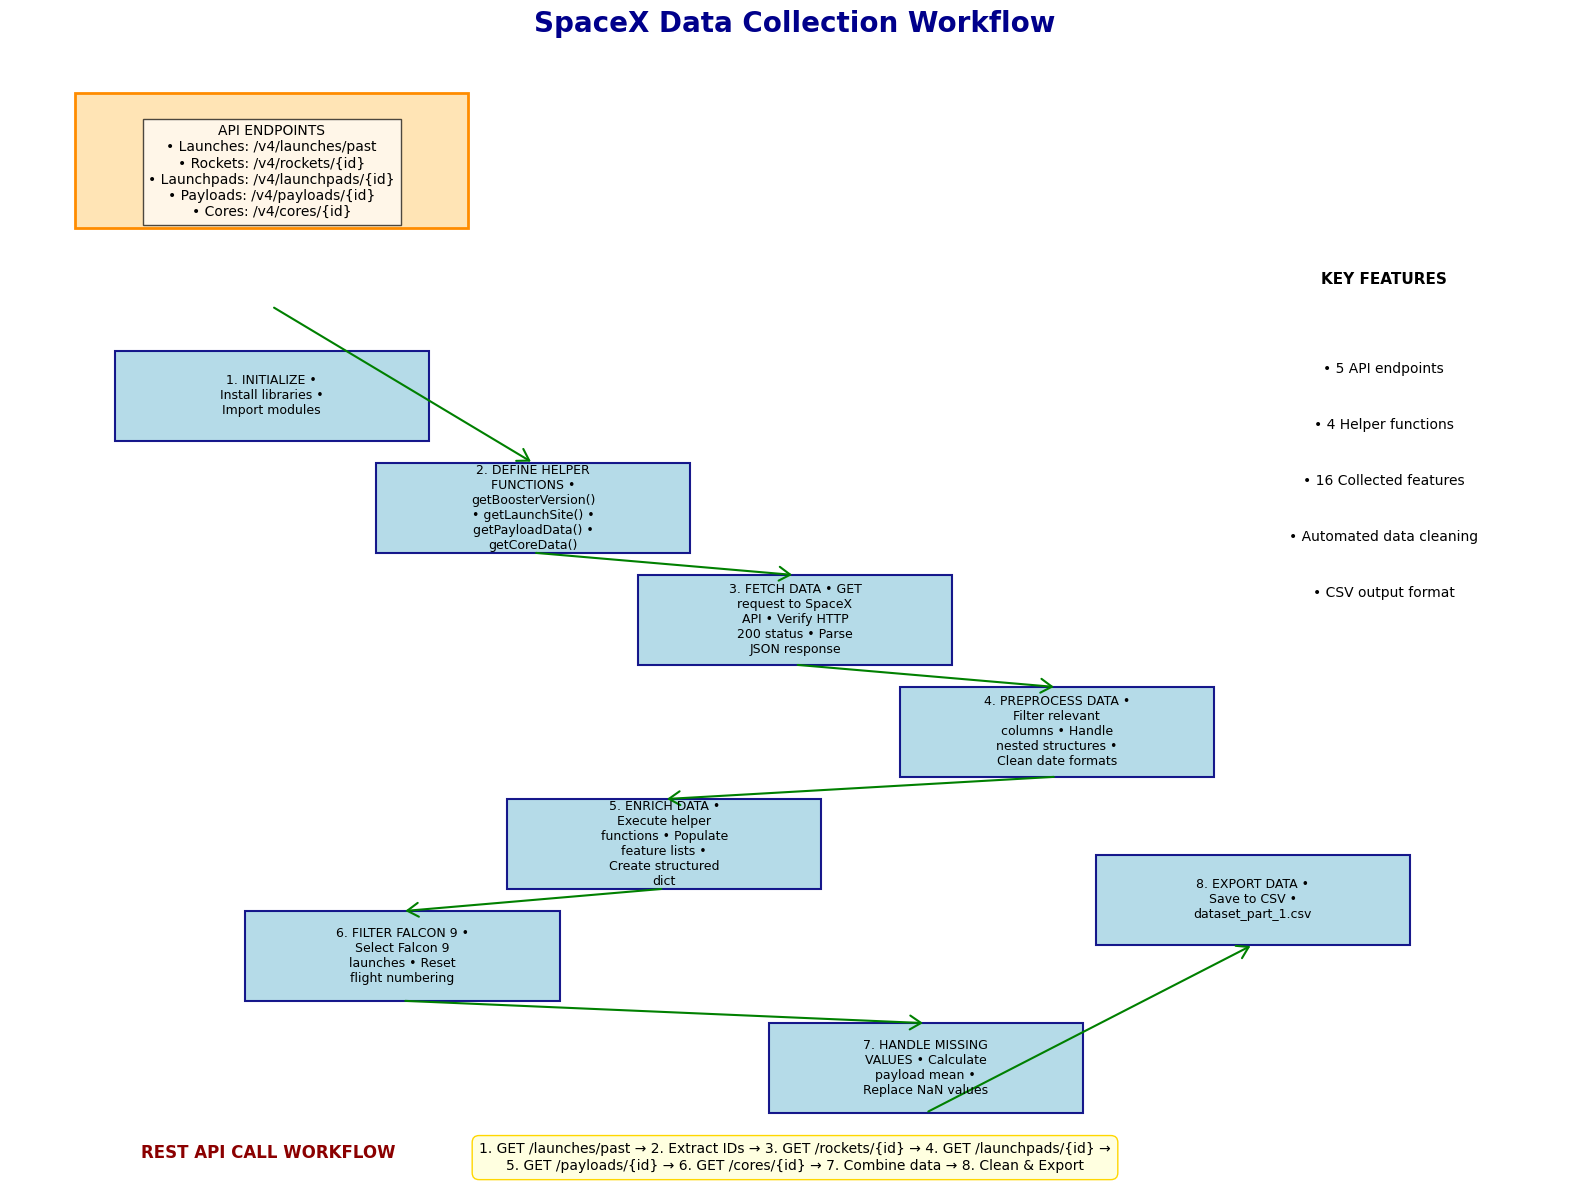

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import textwrap

# Create flowchart
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
plt.title('SpaceX Data Collection Workflow', fontsize=20, weight='bold', pad=20, color='darkblue')

# API endpoints box
api_box = Rectangle((0.5, 8.5), 3, 1.2, fill=True, facecolor='#FFE4B5', edgecolor='darkorange', lw=2)
ax.add_patch(api_box)
api_text = "API ENDPOINTS\n" \
           "• Launches: /v4/launches/past\n" \
           "• Rockets: /v4/rockets/{id}\n" \
           "• Launchpads: /v4/launchpads/{id}\n" \
           "• Payloads: /v4/payloads/{id}\n" \
           "• Cores: /v4/cores/{id}"
plt.text(2, 9, api_text, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Process steps
steps = [
    (2, 7.0, "1. INITIALIZE\n• Install libraries\n• Import modules"),
    (4, 6.0, "2. DEFINE HELPER FUNCTIONS\n• getBoosterVersion()\n• getLaunchSite()\n• getPayloadData()\n• getCoreData()"),
    (6, 5.0, "3. FETCH DATA\n• GET request to SpaceX API\n• Verify HTTP 200 status\n• Parse JSON response"),
    (8, 4.0, "4. PREPROCESS DATA\n• Filter relevant columns\n• Handle nested structures\n• Clean date formats"),
    (5, 3.0, "5. ENRICH DATA\n• Execute helper functions\n• Populate feature lists\n• Create structured dict"),
    (3, 2.0, "6. FILTER FALCON 9\n• Select Falcon 9 launches\n• Reset flight numbering"),
    (7, 1.0, "7. HANDLE MISSING VALUES\n• Calculate payload mean\n• Replace NaN values"),
    (9.5, 2.5, "8. EXPORT DATA\n• Save to CSV\n• dataset_part_1.csv")
]

# Draw steps
for x, y, text in steps:
    ax.add_patch(Rectangle((x-1.2, y-0.4), 2.4, 0.8, fill=True, facecolor='lightblue', edgecolor='navy', lw=1.5, alpha=0.9))
    wrapped_text = textwrap.fill(text, width=20)
    plt.text(x, y, wrapped_text, ha='center', va='center', fontsize=9)

# Draw connectors
arrows = [
    ((2, 7.8), (4, 6.4)),  # 1 -> 2
    ((4, 5.6), (6, 5.4)),  # 2 -> 3
    ((6, 4.6), (8, 4.4)),  # 3 -> 4
    ((8, 3.6), (5, 3.4)),  # 4 -> 5
    ((5, 2.6), (3, 2.4)),  # 5 -> 6
    ((3, 1.6), (7, 1.4)),  # 6 -> 7
    ((7, 0.6), (9.5, 2.1))  # 7 -> 8
]

for (x1, y1), (x2, y2) in arrows:
    ax.add_patch(FancyArrowPatch((x1, y1), (x2, y2), 
                 arrowstyle='->,head_width=5,head_length=8', 
                 color='green', lw=1.5))

# Add workflow diagram
plt.text(1, 0.2, "REST API CALL WORKFLOW", fontsize=12, weight='bold', color='darkred')
flow_text = "1. GET /launches/past → 2. Extract IDs → 3. GET /rockets/{id} → 4. GET /launchpads/{id} →\n" \
            "5. GET /payloads/{id} → 6. GET /cores/{id} → 7. Combine data → 8. Clean & Export"
plt.text(6, 0.2, flow_text, ha='center', va='center', fontsize=10, 
         bbox=dict(facecolor='lightyellow', edgecolor='gold', boxstyle='round,pad=0.5'))

# Add key features
features = [
    "• 5 API endpoints",
    "• 4 Helper functions",
    "• 16 Collected features",
    "• Automated data cleaning",
    "• CSV output format"
]
plt.text(10.5, 8, "KEY FEATURES", fontsize=11, weight='bold', ha='center')
for i, feature in enumerate(features):
    plt.text(10.5, 7.2 - i*0.5, feature, ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('spacex_data_flow.png', dpi=300, bbox_inches='tight')
print("Flowchart saved as 'spacex_data_flow.png'")

# Text documentation
documentation = """
SPACEX DATA COLLECTION PROCESS

1. INITIALIZATION:
   - Install required libraries: requests, pandas, numpy
   - Import modules and configure display settings

2. HELPER FUNCTION DEFINITIONS:
   - getBoosterVersion(): Fetches rocket name using rocket ID
   - getLaunchSite(): Retrieves launch site coordinates and name
   - getPayloadData(): Collects payload mass and orbit information
   - getCoreData(): Gathers core/booster details including landing status

3. API REQUEST EXECUTION:
   - GET request to SpaceX API endpoint: https://api.spacexdata.com/v4/launches/past
   - Verify HTTP status code (200 = success)
   - Parse JSON response into pandas DataFrame

4. DATA PREPROCESSING:
   - Filter relevant columns: rocket, payloads, launchpad, cores, flight_number, date_utc
   - Remove entries with multiple cores/payloads
   - Convert date_utc to date format
   - Filter launches up to 2020-11-13

5. DATA ENRICHMENT:
   - Initialize empty lists for features
   - Execute helper functions to populate feature lists
   - Combine all features into structured dictionary
   - Create final DataFrame from dictionary

6. FALCON 9 FILTERING:
   - Filter dataframe to only include Falcon 9 launches
   - Reset flight numbering sequence

7. MISSING VALUE HANDLING:
   - Calculate mean payload mass
   - Replace NaN values with calculated mean

8. DATA EXPORT:
   - Save processed dataset to CSV file
"""

print("\n" + "="*80)
print(documentation)
print("="*80)